In [1]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
import time

In [3]:
import datetime

In [4]:
from sklearn.model_selection import train_test_split

## 1. Load the datasets

For the project, we provide a training set with 50000 images in the directory `../data/images/` with:
- noisy labels for all images provided in `../data/noisy_label.csv`;
- clean labels for the first 10000 images provided in `../data/clean_labels.csv`. 

In [5]:
# [DO NOT MODIFY THIS CELL]

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))
for i in range(n_img):
    img_fn = f'../data/images/{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

# load the labels
clean_labels = np.genfromtxt('../data/clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('../data/noisy_labels.csv', delimiter=',', dtype="int8")

For illustration, we present a small subset (of size 8) of the images with their clean and noisy labels in `clean_noisy_trainset`. You are encouraged to explore more characteristics of the label noises on the whole dataset. 

Clean labels:
 frog truck truck  deer   car   car  bird horse
Noisy labels:
  cat   dog truck  frog   dog  ship  bird  deer


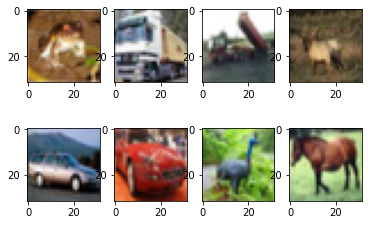

In [6]:
# [DO NOT MODIFY THIS CELL]

fig = plt.figure()

ax1 = fig.add_subplot(2,4,1)
ax1.imshow(imgs[0]/255)
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(imgs[1]/255)
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(imgs[2]/255)
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgs[3]/255)
ax1 = fig.add_subplot(2,4,5)
ax1.imshow(imgs[4]/255)
ax2 = fig.add_subplot(2,4,6)
ax2.imshow(imgs[5]/255)
ax3 = fig.add_subplot(2,4,7)
ax3.imshow(imgs[6]/255)
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgs[7]/255)

# The class-label correspondence
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# print clean labels
print('Clean labels:')
print(' '.join('%5s' % classes[clean_labels[j]] for j in range(8)))
# print noisy labels
print('Noisy labels:')
print(' '.join('%5s' % classes[noisy_labels[j]] for j in range(8)))


## 2. The predictive model

We consider a baseline model directly on the noisy dataset without any label corrections. RGB histogram features are extracted to fit a logistic regression model.

### 2.1. Baseline Model

In [8]:
# [DO NOT MODIFY THIS CELL]
# RGB histogram dataset construction
no_bins = 6
bins = np.linspace(0,255,no_bins) # the range of the rgb histogram
target_vec = np.empty(n_img)
feature_mtx = np.empty((n_img,3*(len(bins)-1)))
i = 0
for i in range(n_img):
    # The target vector consists of noisy labels
    target_vec[i] = noisy_labels[i]
    
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

In [9]:
# [DO NOT MODIFY THIS CELL]
# Train a logistic regression model 
clf = LogisticRegression(random_state=0).fit(feature_mtx, target_vec)

For the convenience of evaluation, we write the following function `predictive_model` that does the label prediction. **For your predictive model, feel free to modify the function, but make sure the function takes an RGB image of numpy.array format with dimension $32\times32\times3$  as input, and returns one single label as output.**

In [10]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

### 2.2. Model I

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
# [BUILD A MORE SOPHISTICATED PREDICTIVE MODEL]

# write your code here...

def model_I(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    result = model1.predict(np.array([image/255,]))
    result = np.argmax(result,axis = 1)
    return result
    

In [13]:

def create_model_I():
    model = tf.keras.models.Sequential([tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(32, (3,3),strides=1,padding="same", activation='tanh', input_shape=(28, 28, 1)),
                                        tf.keras.layers.MaxPooling2D((2, 2)),
                                        tf.keras.layers.Conv2D(64, (3,3),strides=1,padding="same", activation='tanh'),
                                        tf.keras.layers.MaxPooling2D((2, 2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dropout(0.8),
                                        tf.keras.layers.Dense(30, activation='relu'),
                                        tf.keras.layers.Dense(10, activation="softmax")])


    return model

In [14]:
start_time = time.time()
model1_new = create_model_I()
#compile model
#model1_new.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
model1_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model fitting
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
# model1.fit(imgs,noisy_labels,epochs = 5, validation_split =0.2,callbacks=[timer,early_stop])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model1_new.fit(x=imgs, 
          y=noisy_labels,
          batch_size=256,
          epochs=5, 
           validation_split =0.2, 
          callbacks=[tensorboard_callback])
print('-----Model1 run time: %s seconds-----'%(time.time()-start_time))

Epoch 1/5
157/157 [==============================] - 21s 133ms/step - loss: 2.2943 - accuracy: 0.1287 - val_loss: 2.2670 - val_accuracy: 0.1671
Epoch 2/5
157/157 [==============================] - 20s 130ms/step - loss: 2.2626 - accuracy: 0.1672 - val_loss: 2.2412 - val_accuracy: 0.1967
Epoch 3/5
157/157 [==============================] - 20s 128ms/step - loss: 2.2434 - accuracy: 0.1896 - val_loss: 2.2331 - val_accuracy: 0.2021
Epoch 4/5
157/157 [==============================] - 20s 127ms/step - loss: 2.2322 - accuracy: 0.1981 - val_loss: 2.2243 - val_accuracy: 0.2111
Epoch 5/5
157/157 [==============================] - 20s 127ms/step - loss: 2.2232 - accuracy: 0.2072 - val_loss: 2.2185 - val_accuracy: 0.2148
-----Model1 run time: 103.51567769050598 seconds-----


In [15]:
#save trained model
model1_new.save('model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


### 2.3. Model II

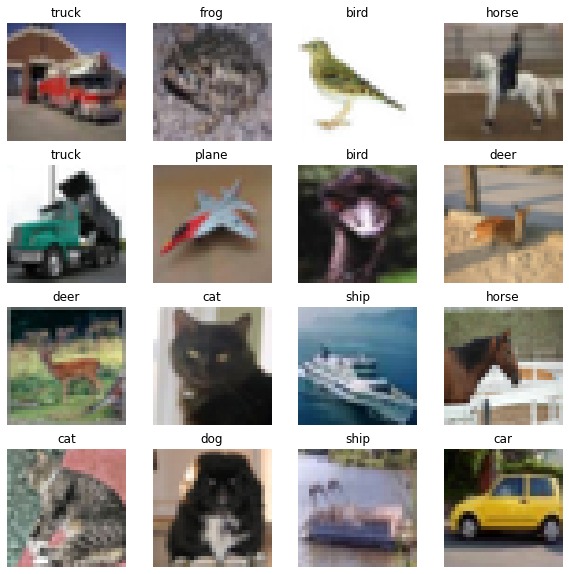

In [168]:
import matplotlib.pyplot as plt

imgs_c = imgs[:10000].reshape(-1,32,32,3)

fig, ax = plt.subplots(4,4, figsize = (10,10))
for i in range(4):
    for j in range(4):
        n = int(np.random.randint(10000, size=1))
        ax[i,j].imshow(imgs_c[n]/255)
        ax[i,j].title.set_text(classes[clean_labels[n]])
        ax[i,j].axis("off")

In [224]:
import tensorflow as tf
def label_cor():
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

        
      tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
])
    return model

In [225]:
#train based on clear data 
label_corr = label_cor()
#compile model

label_corr.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(),metrics=['accuracy'])

#model fitting
early_stop =tf.keras.callbacks.EarlyStopping(patience=3)
label_corr.fit(x=imgs_c, y=clean_labels, epochs=30,batch_size=256,validation_split =0.1,callbacks=[early_stop])
print('-----label_corr run time: %s seconds-----'%(time.time()-start_time))


Epoch 1/30
36/36 [==============================] - 36s 963ms/step - loss: 1.7484 - accuracy: 0.4020 - val_loss: 5.1703 - val_accuracy: 0.2480
Epoch 2/30
36/36 [==============================] - 34s 954ms/step - loss: 1.1009 - accuracy: 0.6184 - val_loss: 2.8536 - val_accuracy: 0.2850
Epoch 3/30
36/36 [==============================] - 36s 1s/step - loss: 0.7465 - accuracy: 0.7603 - val_loss: 2.4925 - val_accuracy: 0.3620
Epoch 4/30
36/36 [==============================] - 37s 1s/step - loss: 0.4565 - accuracy: 0.8729 - val_loss: 1.7087 - val_accuracy: 0.4400
Epoch 5/30
36/36 [==============================] - 38s 1s/step - loss: 0.2913 - accuracy: 0.9340 - val_loss: 1.5605 - val_accuracy: 0.4990
Epoch 6/30
36/36 [==============================] - 36s 999ms/step - loss: 0.1777 - accuracy: 0.9680 - val_loss: 1.4845 - val_accuracy: 0.5370
Epoch 7/30
36/36 [==============================] - 35s 978ms/step - loss: 0.1069 - accuracy: 0.9879 - val_loss: 1.4602 - val_accuracy: 0.5270
Epoch 8/

In [226]:
# [ADD WEAKLY SUPERVISED LEARNING FEATURE TO MODEL I]

# write your code here...

def model_II(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    result = model1.predict(np.array([image/255,]))
    result = np.argmax(result,axis = 1)
    return result
    

In [227]:
#create training and testing set for model
imgs_c = imgs[:10000].reshape(-1,32,32,3)
x_tr, x_te, y_tr, y_te = train_test_split(imgs_c,clean_labels,test_size=0.2,random_state=42)

In [228]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [229]:
#create training and testing set for model
imgs_c = imgs[:10000].reshape(-1,32,32,3)
noisy_lab = (np.array(noisy_labels[10000:])).reshape(-1,1)
x_tr, x_te, y_tr, y_te = train_test_split(imgs_c,noisy_lab[:10000],test_size=0.2,random_state=42)
x_tr = tf.cast(x_tr,dtype='float32')/255.0
x_te = tf.cast(x_te,dtype='float32')/255.0

In [230]:
#clean 40000 after pic
imgs_n = imgs[10000:].reshape(-1,32,32,3)
new_predictions = np.argmax(label_corr.predict(imgs_n),axis=1)

1250/1250 [==============================] - 33s 26ms/step


In [231]:
# #get cleaned labels
# imgs_n = imgs[10000:].reshape(-1,32,32,3)
# imgs_n = tf.cast(imgs_n,dtype='float32')/255.0
# cleaned_labels = np.argmax(label_corr.predict(imgs_n),axis=1)
labels = np.append(clean_labels,new_predictions)
#create training and testing set for modelII
#x_tr, x_te, y_tr, y_te = train_test_split(imgs,labels,test_size=0.1,shuffle=False)

In [235]:
def create_model_II():
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

        
      tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
])
    return model

In [236]:
model2= create_model_II()

In [237]:
start_time = time.time()
#compile model
model2.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(),metrics=['accuracy'])

#model fitting
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
model2.fit(x=imgs, y=labels, epochs=10, validation_split =0.1,callbacks=[early_stop])

print('-----Model1 run time: %s seconds-----'%(time.time()-start_time))

Epoch 1/10
1407/1407 [==============================] - 242s 171ms/step - loss: 1.2184 - accuracy: 0.5680 - val_loss: 1.0251 - val_accuracy: 0.6256
Epoch 2/10
1407/1407 [==============================] - 244s 173ms/step - loss: 0.8626 - accuracy: 0.6908 - val_loss: 0.8770 - val_accuracy: 0.6812
Epoch 3/10
1407/1407 [==============================] - 236s 168ms/step - loss: 0.6551 - accuracy: 0.7657 - val_loss: 1.0315 - val_accuracy: 0.6536
Epoch 4/10
1407/1407 [==============================] - 227s 161ms/step - loss: 0.4707 - accuracy: 0.8329 - val_loss: 1.0328 - val_accuracy: 0.6458
Epoch 5/10
1407/1407 [==============================] - 237s 169ms/step - loss: 0.3370 - accuracy: 0.8824 - val_loss: 1.0170 - val_accuracy: 0.6810
-----Model1 run time: 1186.5750710964203 seconds-----


In [238]:
#save trained model
model2.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


## 3. Evaluation

For assessment, we will evaluate your final model on a hidden test dataset with clean labels by the `evaluation` function defined as follows. Although you will not have the access to the test set, the function would be useful for the model developments. For example, you can split the small training set, using one portion for weakly supervised learning and the other for validation purpose. 

In [239]:
# [DO NOT MODIFY THIS CELL]
def evaluation(model, test_labels, test_imgs):
    y_true = test_labels
    y_pred = []
    for image in test_imgs:
        y_pred.append(model(image))
    print(classification_report(y_true, y_pred))

In [240]:
# [DO NOT MODIFY THIS CELL]
# This is the code for evaluating the prediction performance on a testset
# You will get an error if running this cell, as you do not have the testset
# Nonetheless, you can create your own validation set to run the evlauation
n_test = 10000
test_labels = np.genfromtxt('../data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
evaluation(baseline_model, test_labels, test_imgs)

OSError: ../data/test_labels.csv not found.

The overall accuracy is $0.24$, which is better than random guess (which should have a accuracy around $0.10$). For the project, you should try to improve the performance by the following strategies:

- Consider a better choice of model architectures, hyperparameters, or training scheme for the predictive model;
- Use both `clean_noisy_trainset` and `noisy_trainset` for model training via **weakly supervised learning** methods. One possible solution is to train a "label-correction" model using the former, correct the labels in the latter, and train the final predictive model using the corrected dataset.
- Apply techniques such as $k$-fold cross validation to avoid overfitting;
- Any other reasonable strategies.

In [ ]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

In [ ]:
# [DO NOT MODIFY THIS CELL]
# This is the code for evaluating the prediction performance on a testset
# You will get an error if running this cell, as you do not have the testset
# Nonetheless, you can create your own validation set to run the evlauation
n_test = 10000
test_labels = np.genfromtxt('../data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
evaluation(baseline_model, test_labels, test_imgs)

In [ ]:
#generate classification report
##1. baseline
feature_mtx_pred = np.empty((10000,3*(len(bins)-1)))
for i in range(10000):
   
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(test_imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(test_imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(test_imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx_pred[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

pred_base = clf.predict(feature_mtx_pred)

report_base = classification_report(test_labels,pred_base)
print('---------baseline_model classification report----------')
print(report_base)

#model 1
model1_pred = tf.keras.models.load_model('model1')
pred_1 = model1_pred.predict(test_imgs)
pred_1 = np.argmax(pred_1,axis=-1)

report_1 = classification_report(test_labels,pred_1)
print('---------model1 classification report----------')
print(report_1)

#model 2
model2_pred = tf.keras.models.load_model('model2')
pred_2 = model2_pred.predict(test_imgs)
pred_2 = np.argmax(pred_2,axis=-1)
report_2 = classification_report(test_labels,pred_2)
print('---------model 2 classification report----------')
print(report_2)

In [ ]:
#generate prediction for models and export csv file
output_df = pd.DataFrame()

#baseline
feature_mtx_pred = np.empty((10000,3*(len(bins)-1)))
for i in range(10000):
   
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(test_imgs[i][:,:,0],bins=bins)[0] 
    feature2 = np.histogram(test_imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(test_imgs[i][:,:,2],bins=bins)[0]
    
    # Concatenate three features
    feature_mtx_pred[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

pred_base = clf.predict(feature_mtx_pred)
pred_base = clf.predict(feature_mtx_pred)
#model1
model1_pred = tf.keras.models.load_model('model1')
pred_1 = model1_pred.predict(test_imgs)
pred_1 = np.argmax(pred_1,axis=-1)
#model 2
model2_pred = tf.keras.models.load_model('model2')
pred_2 = model2_pred.predict(test_imgs)
pred_2 = np.argmax(pred_2,axis=-1)

index_vals = np.arange(10000)
output_df = pd.DataFrame(index=index_vals)
output_df['baseline_pred'] = pred_base
output_df['modelI_pred'] = pred_1
output_df['modelII_pred'] = pred_2
output_df.to_csv('label_prediction.csv')